# 데이터 다운로드
> http://taas.koroad.or.kr/api/selectDeathDataSet.do

### 한글 폰트 설정

In [ ]:
# 코랩 사용자는 실행후, 런타임 - 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [15]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumBarunGothic')

# 지도 시각화 라이브러리(folium) 설치

In [1]:
!pip install folium

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 30)

### 교통사고정보 읽어오기
- `'12_20_death.csv'`

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012010101,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680
1,2012,2012010101,야간,일,1,6,5,0,0,전북,정읍시,차대차,정면충돌,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,946537,1737695,126.909523,35.633956
2,2012,2012010108,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268
3,2012,2012010110,주간,일,2,2,0,0,0,경남,합천군,차대차,측면충돌,측면충돌,과속,교차로,교차로내,승합차,승용차,1059321,1748774,128.155984,35.733503
4,2012,2012010103,야간,일,1,1,0,0,0,경북,예천군,차량단독,도로이탈,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,1070222,1834630,128.284180,36.506769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37123,2020,2020102800,야간,수,1,1,0,0,0,경기,평택시,차량단독,전도,전도,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,948247,1889244,126.918350,37.000257
37124,2020,2020110415,주간,수,1,1,0,0,0,경기,평택시,차량단독,기타,기타,안전운전 의무 불이행,단일로,기타단일로,특수차,없음,961427,1897205,127.066067,37.072652
37125,2020,2020121513,주간,화,1,6,0,5,0,경기,평택시,차대차,기타,기타,안전운전 의무 불이행,교차로,교차로내,승용차,승용차,948888,1887713,126.925658,36.986492
37126,2020,2020122021,야간,일,1,1,0,0,0,경기,평택시,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,960330,1895992,127.053790,37.061672


### 결측값, 데이터 타입 확인

발생년             0
발생년월일시          0
주야              0
요일              0
사망자수            0
사상자수            0
중상자수            0
경상자수            0
부상신고자수          0
발생지시도           0
발생지시군구          0
사고유형_대분류        0
사고유형_중분류        0
사고유형            0
법규위반            0
도로형태_대분류        0
도로형태            0
당사자종별_1당_대분류    0
당사자종별_2당_대분류    0
발생위치X_UTMK      0
발생위치Y_UTMK      0
경도              0
위도              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37128 entries, 0 to 37127
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           37128 non-null  int64  
 1   발생년월일시        37128 non-null  int64  
 2   주야            37128 non-null  object 
 3   요일            37128 non-null  object 
 4   사망자수          37128 non-null  int64  
 5   사상자수          37128 non-null  int64  
 6   중상자수          37128 non-null  int64  
 7   경상자수          37128 non-null  int64  
 8   부상신고자수        37128 non-null  int64  
 9   발생지시도         37128 non-null  object 
 10  발생지시군구        37128 non-null  object 
 11  사고유형_대분류      37128 non-null  object 
 12  사고유형_중분류      37128 non-null  object 
 13  사고유형          37128 non-null  object 
 14  법규위반          37128 non-null  object 
 15  도로형태_대분류      37128 non-null  object 
 16  도로형태          37128 non-null  object 
 17  당사자종별_1당_대분류  37128 non-null  object 
 18  당사자종별_2당_대분류  37128 non-nu

### 날짜 컬럼 타입 변경
- 날짜 포맷 참조 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012-01-01 01:00:00,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680
1,2012,2012-01-01 01:00:00,야간,일,1,6,5,0,0,전북,정읍시,차대차,정면충돌,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,946537,1737695,126.909523,35.633956
2,2012,2012-01-01 08:00:00,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268
3,2012,2012-01-01 10:00:00,주간,일,2,2,0,0,0,경남,합천군,차대차,측면충돌,측면충돌,과속,교차로,교차로내,승합차,승용차,1059321,1748774,128.155984,35.733503
4,2012,2012-01-01 03:00:00,야간,일,1,1,0,0,0,경북,예천군,차량단독,도로이탈,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,1070222,1834630,128.284180,36.506769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37123,2020,2020-10-28 00:00:00,야간,수,1,1,0,0,0,경기,평택시,차량단독,전도,전도,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,948247,1889244,126.918350,37.000257
37124,2020,2020-11-04 15:00:00,주간,수,1,1,0,0,0,경기,평택시,차량단독,기타,기타,안전운전 의무 불이행,단일로,기타단일로,특수차,없음,961427,1897205,127.066067,37.072652
37125,2020,2020-12-15 13:00:00,주간,화,1,6,0,5,0,경기,평택시,차대차,기타,기타,안전운전 의무 불이행,교차로,교차로내,승용차,승용차,948888,1887713,126.925658,36.986492
37126,2020,2020-12-20 21:00:00,야간,일,1,1,0,0,0,경기,평택시,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,960330,1895992,127.053790,37.061672


### 데이터 타입에 따른 정보 추출
- 문자열 : `컬럼.str`
- 날짜 : `컬럼.dt`

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생월,발생시간
0,2012,2012-01-01 01:00:00,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680,1,1
1,2012,2012-01-01 01:00:00,야간,일,1,6,5,0,0,전북,정읍시,차대차,정면충돌,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,946537,1737695,126.909523,35.633956,1,1
2,2012,2012-01-01 08:00:00,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268,1,8
3,2012,2012-01-01 10:00:00,주간,일,2,2,0,0,0,경남,합천군,차대차,측면충돌,측면충돌,과속,교차로,교차로내,승합차,승용차,1059321,1748774,128.155984,35.733503,1,10
4,2012,2012-01-01 03:00:00,야간,일,1,1,0,0,0,경북,예천군,차량단독,도로이탈,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,1070222,1834630,128.284180,36.506769,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37123,2020,2020-10-28 00:00:00,야간,수,1,1,0,0,0,경기,평택시,차량단독,전도,전도,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,948247,1889244,126.918350,37.000257,10,0
37124,2020,2020-11-04 15:00:00,주간,수,1,1,0,0,0,경기,평택시,차량단독,기타,기타,안전운전 의무 불이행,단일로,기타단일로,특수차,없음,961427,1897205,127.066067,37.072652,11,15
37125,2020,2020-12-15 13:00:00,주간,화,1,6,0,5,0,경기,평택시,차대차,기타,기타,안전운전 의무 불이행,교차로,교차로내,승용차,승용차,948888,1887713,126.925658,36.986492,12,13
37126,2020,2020-12-20 21:00:00,야간,일,1,1,0,0,0,경기,평택시,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,960330,1895992,127.053790,37.061672,12,21


### 연도별 교통사고 발생건수

2012    5165
2013    4876
2014    4583
2015    4447
2016    4119
2017    4065
2018    3657
2019    3233
2020    2983
Name: 발생년, dtype: int64

### 시각화로 비교해보기

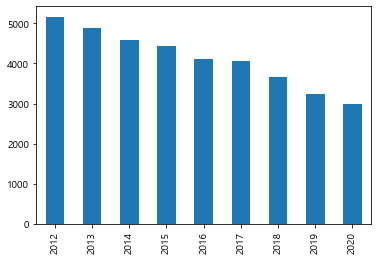

### 요일별 교통사고 발생 건수

금    5576
월    5473
토    5423
화    5418
수    5319
목    5287
일    4632
Name: 요일, dtype: int64

### 시각화로 비교해보기

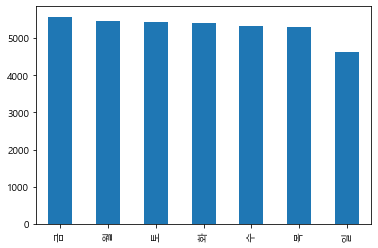

### 발생년도별 사망자, 사상자수

In [31]:
# groupby와 value_counts의 차이?


발생년
2012    5392
2013    5092
2014    4762
2015    4621
2016    4292
2017    4185
2018    3781
2019    3349
2020    3081
Name: 사망자수, dtype: int64

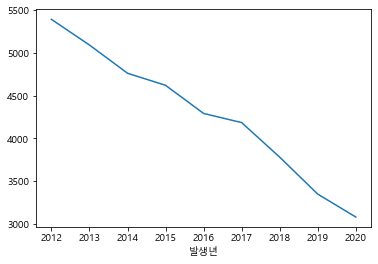

발생년
2012    8665
2013    8068
2014    7222
2015    7282
2016    6493
2017    6390
2018    5696
2019    5121
2020    4642
Name: 사상자수, dtype: int64

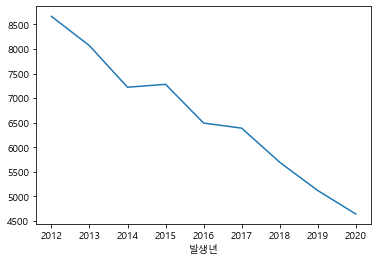

### 사상자, 사망자 상위 5건 사고 조회

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생월,발생시간
26128,2017,2017-09-02 11:00:00,주간,토,1,105,9,68,27,경기,용인시,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승합차,승합차,966501,1899252,127.123055,37.091299,9,11
203,2012,2012-02-24 15:00:00,주간,금,4,100,6,23,67,강원,고성군,차대차,추돌,진행중 추돌,안전운전 의무 불이행,단일로,기타단일로,승합차,승합차,1086497,2023462,128.487966,38.207295,2,15
19072,2016,2016-01-01 09:00:00,주간,금,1,67,4,62,0,전남,곡성군,차대차,추돌,진행중 추돌,안전거리 미확보,단일로,기타단일로,승합차,승합차,974550,1692529,127.220318,35.227824,1,9
17803,2015,2015-07-31 17:00:00,주간,금,2,60,54,4,0,경남,거제시,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승합차,없음,1097971,1656401,128.572280,34.897637,7,17
5361,2013,2013-03-31 20:00:00,야간,일,1,57,45,10,1,전북,무주군,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승합차,승합차,1007186,1780405,127.579748,36.020455,3,20


,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생월,발생시간
21404,2016,2016-10-13 22:00:00,야간,목,10,19,8,1,0,울산,울주군,차량단독,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승합차,없음,1147813,1731792,129.131183,35.571136,10,22
28130,2018,2018-05-01 17:00:00,주간,화,8,19,7,4,0,전남,영암군,차대차,측면충돌,측면충돌,안전운전 의무 불이행,단일로,기타단일로,승합차,승용차,925926,1652275,126.689610,34.862464,5,17
17780,2015,2015-09-01 07:00:00,주간,화,8,8,0,0,0,충북,충주시,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,승합차,건설기계,1028808,1891149,127.823849,37.018412,9,7
7115,2013,2013-12-14 13:00:00,주간,토,6,10,4,0,0,울산,울주군,차대차,추돌,주정차중 추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,승용차,1152501,1745780,129.185543,35.696493,12,13
32706,2019,2019-12-14 04:00:00,야간,토,6,31,13,12,0,경북,군위군,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,1084945,1807249,128.445583,36.258761,12,4


### 그룹핑, 피봇테이블을 활용해서, 다양한 관점으로 분석
- 연도, 지역 별 사상자수

In [39]:
# pivot_table 사용


발생년,2012,2013,2014,2015,2016,2017,2018,2019,2020
발생지시도,,,,,,,,,
강원,551,413,375,415,380,411,286,286,215
경기,1684,1510,1448,1409,1198,1326,1064,1071,956
경남,765,692,578,667,503,447,472,434,404
경북,940,882,738,816,739,596,601,549,492
광주,189,153,138,154,123,189,111,64,92
대구,361,233,267,209,238,200,173,193,174
대전,165,128,133,143,171,125,129,105,81
부산,345,302,229,272,232,224,188,167,132
서울,609,598,574,591,477,461,425,339,289


#### 피봇테이블을 시각화할 때 가장 효과적
- `sns.heatmap()`

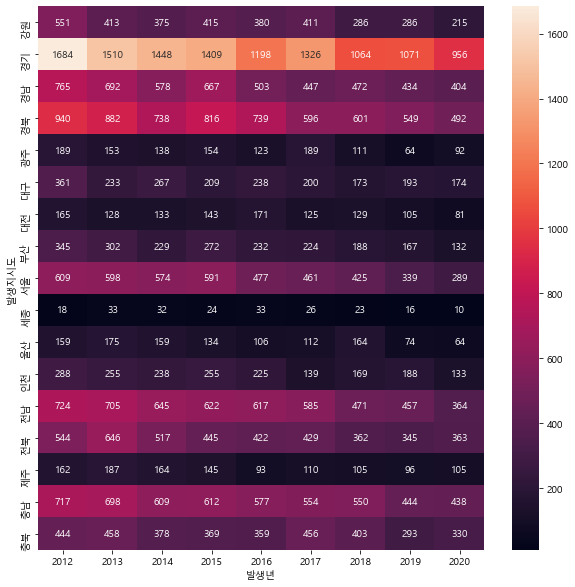

- 시도, 년, 월 별 사상자수

In [48]:
# groupby 사용


사상자수
발생지시도 발생년  발생월      
강원    2012 1      20
           2     121
           3      38
           4      30
           5      45
...              ...
충북    2020 8      34
           9      37
           10     48
           11     58
           12     16

[1807 rows x 1 columns]

- 서울 지역만 시각화

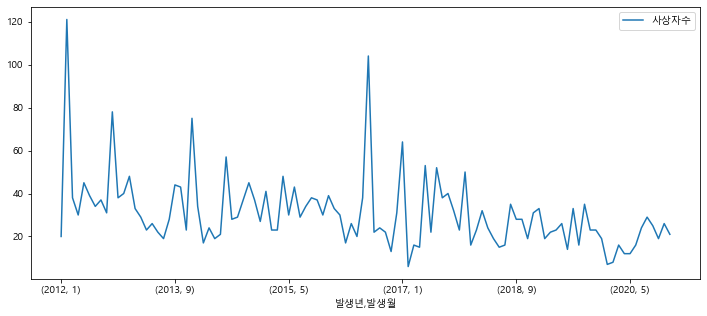

In [50]:
# pivot_table 사용


발생지시도        강원     경기    경남     경북    광주    대구    대전    부산    서울   세종    울산  \
발생년  발생월                                                                       
2012 1     20.0  169.0  55.0   75.0  10.0  20.0  15.0  30.0  52.0  NaN  14.0   
     2    121.0  134.0  45.0   86.0   5.0  41.0  12.0  30.0  46.0  NaN  12.0   
     3     38.0  132.0  46.0   47.0  12.0  26.0   7.0  40.0  54.0  NaN  10.0   
     4     30.0  151.0  81.0  114.0  13.0  37.0  12.0  21.0  50.0  NaN   9.0   
     5     45.0  154.0  92.0   88.0  46.0  33.0  11.0  33.0  32.0  NaN  12.0   
...         ...    ...   ...    ...   ...   ...   ...   ...   ...  ...   ...   
2020 8     29.0   85.0  29.0   54.0  15.0  30.0   7.0   8.0  27.0  NaN   2.0   
     9     25.0   97.0  43.0   33.0   4.0  26.0   7.0  14.0  32.0  NaN   3.0   
     10    19.0   84.0  53.0   55.0  10.0  12.0   2.0   9.0  21.0  1.0   4.0   
     11    26.0   65.0  39.0   38.0  12.0   9.0   8.0  10.0  28.0  NaN   5.0   
     12    21.0   40.0  32.0   38.0   3.0   8.0   1.0   7.0  20.0  1.0   2.0   

발생지시도       인천    전남    전북    제주    충남    충북  
발생년  발생월                                      
2012 1    27.0  36.0  42.0  13.0  43.0  46.0  
     2    15.0  26.0  39.0   3.0  45.0  29.0  
     3    27.0  69.0  27.0   9.0  54.0  26.0  
     4    24.0  83.0  40.0  17.0  79.0  26.0  
     5    21.0  46.0  43.0  43.0  83.0  45.0  
...        ...   ...   ...   ...   ...   ...  
2020 8     6.0  41.0  36.0   6.0  39.0  34.0  
     9    14.0  40.0  27.0  13.0  26.0  37.0  
     10   24.0  37.0  37.0   6.0  41.0  48.0  
     11   22.0  20.0  27.0  21.0  35.0  58.0  
     12   12.0  41.0  21.0   8.0  51.0  16.0  

[108 rows x 17 columns]

- 시각화(컬럼별 라인차트 생성)

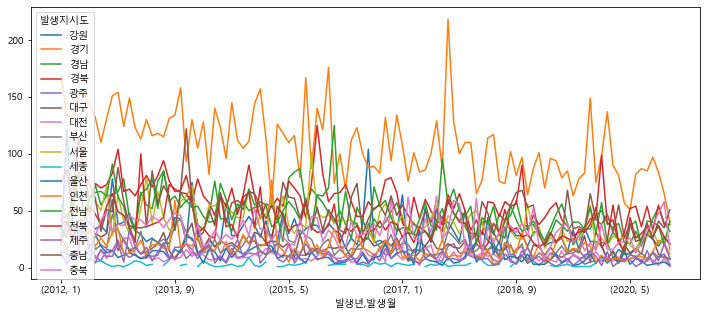

- 사고유형 대분류별 피해자 확인

In [56]:
# groupby 사용


,사상자수,사망자수,중상자수,경상자수
사고유형_대분류,,,,
차대사람,16118,14574,758,702
차대차,32278,15629,7504,8184
차량단독,11168,8339,1893,810
철길건널목,15,13,2,0


- 지역과 사고유형 대분류별 피해자 확인

In [58]:
# pivot_table 사용


경상자수                   사망자수                    사상자수              \
사고유형_대분류 차대사람   차대차 차량단독 철길건널목  차대사람   차대차  차량단독 철길건널목  차대사람   차대차  차량단독   
발생지시도                                                                      
강원         23   500   63     0   593   712   644     2   642  1800   888   
경기        140  1891  104     0  2810  3098  1350     2  3120  6784  1759   
경남         31   473   71     0  1204  1404   783     0  1320  2517  1125   
경북         67   772  107     0  1233  1770  1121     3  1363  3497  1490   
광주         37   170    9     0   428   299    89     0   498   603   112   
대구         36   235   29     0   610   572   193     0   680  1097   271   
대전         22   138    6     0   418   288   127     0   455   561   164   
부산         36   214    9     0   730   492   227     1   835   956   299   
서울        117   520   16     0  1695  1019   328     0  1928  2035   400   
세종          4    21    1     0    33    85    41     0    38   125    52   
울산         12   176    7     0   314   287   169     1   345   588   213   
인천         21   285   19     0   545   494   175     0   592  1054   244   
전남         61   741  126     0  1055  1283  1027     0  1173  2651  1366   
전북         25   584   87     0   881  1185   583     2   938  2321   811   
제주          6   138   12     0   335   253   172     0   367   569   231   
충남         36   732   59     0  1047  1428   813     1  1131  3009  1058   
충북         28   594   85     0   643   960   497     1   693  2111   685   

               중상자수                   
사고유형_대분류 철길건널목 차대사람   차대차 차량단독 철길건널목  
발생지시도                                 
강원           2   25   482  169     0  
경기           3  150  1406  267     1  
경남           0   78   598  264     0  
경북           3   57   887  242     0  
광주           0   32   123   14     0  
대구           0   31   269   47     0  
대전           0   15   129   30     0  
부산           1   60   222   56     0  
서울           0   95   410   53     0  
세종           0    0    19   10     0  
울산           1   19   109   33     0  
인천           0   21   244   48     0  
전남           0   54   590  205     0  
전북           3   31   540  140     1  
제주           0   23   157   40     0  
충남           1   46   799  176     0  
충북           1   21   520   99     0

In [59]:
# 사상자수 정보만 빼내기


사고유형_대분류,차대사람,차대차,차량단독,철길건널목
발생지시도,,,,
강원,642,1800,888,2
경기,3120,6784,1759,3
경남,1320,2517,1125,0
경북,1363,3497,1490,3
광주,498,603,112,0
대구,680,1097,271,0
대전,455,561,164,0
부산,835,956,299,1
서울,1928,2035,400,0


- 시도, 시군구 별 사고 횟수 확인

사상자수
발생지시도 발생지시군구      
강원    강릉시      190
      고성군       58
      동해시       75
      삼척시       85
      속초시       61
...            ...
충북    증평군       38
      진천군      126
      청원군      103
      청주시      588
      충주시      295

[231 rows x 1 columns]

In [61]:
# 위 결과를 정렬


사상자수
발생지시도 발생지시군구       
충남    연기군         6
경북    울릉군         9
충남    계룡시        15
경기    과천시        26
경북    영양군        30
...             ...
충남    천안시       483
경기    평택시       490
      화성시       493
충북    청주시       588
경남    창원시(통합)   653

[231 rows x 1 columns]

- 사고 당사자별 사상자수 확인

In [63]:
# pivot_table 사용


당사자종별_2당_대분류,개인형이동수단(PM),건설기계,기타,농기계,보행자,불명,사륜오토바이(ATV),승용차,승합차,없음,열차,원동기장치자전거,이륜차,자전거,특수차,화물차
당사자종별_1당_대분류,,,,,,,,,,,,,,,,
개인형이동수단(PM),0,1,0,0,1,0,0,9,1,14,0,0,0,0,0,3
건설기계,1,14,0,12,405,0,2,276,104,111,0,36,64,91,6,99
기타,0,1,0,0,0,0,0,2,0,5,0,0,0,1,0,4
농기계,0,1,0,5,22,0,0,64,4,554,0,14,16,0,1,30
불명,0,0,0,0,24,1,0,23,0,4,0,3,7,2,0,8
사륜오토바이(ATV),0,1,0,0,1,0,0,28,5,125,0,0,5,0,3,18
승용차,9,444,20,438,9628,21,18,6541,1865,4939,6,429,1251,653,293,2914
승합차,0,149,3,72,1814,1,5,1147,887,920,0,62,154,157,17,742
원동기장치자전거,0,28,0,9,99,1,0,530,99,598,0,24,9,19,12,281


- `sns.heatmap`으로 시각화

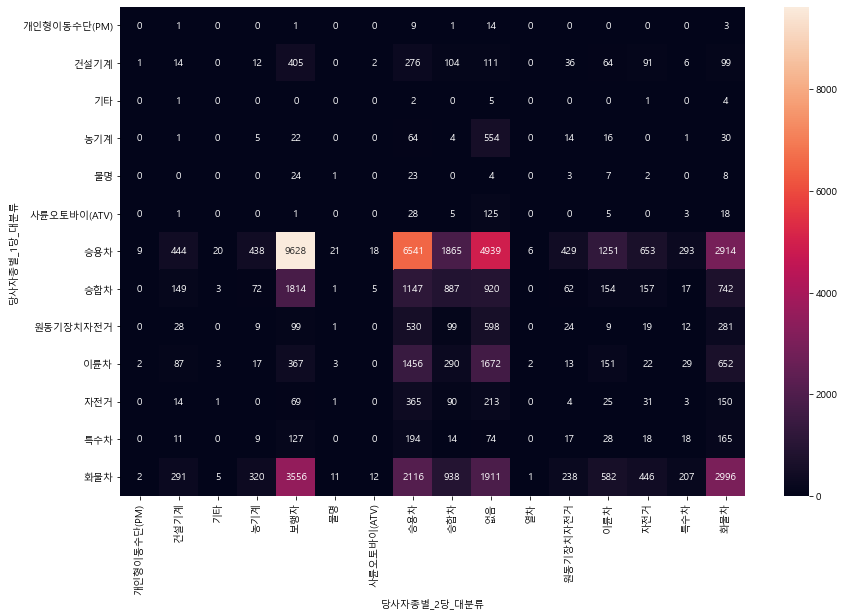

- 연도별 교통사고의 법규위반 확인

In [70]:
# pivot_table 사용


법규위반,과속,교차로 통행방법 위반,기타,보행자 보호의무 위반,신호위반,안전거리 미확보,안전운전 의무 불이행,중앙선 침범
발생년,,,,,,,,
2012,101,106,189,173,371,93,3730,402
2013,127,91,148,168,339,81,3544,378
2014,164,80,145,164,344,71,3267,348
2015,152,61,168,169,362,83,3080,372
2016,178,68,128,174,333,68,2856,314
2017,200,64,129,157,307,74,2824,310
2018,220,56,111,134,288,65,2523,260
2019,217,45,92,116,304,56,2171,232
2020,251,30,99,103,264,57,2000,179


- 시각화(컬럼별 막대차트 생성)

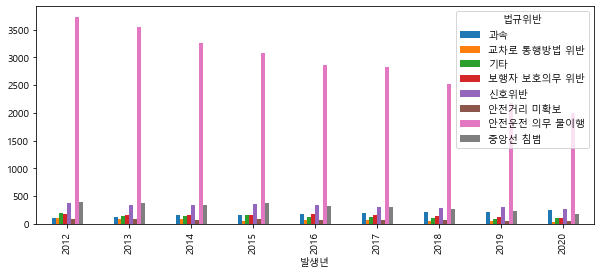

- 연도, 시간 별 사고 건수 확인

발생년,2012,2013,2014,2015,2016,2017,2018,2019,2020
발생시간,,,,,,,,,
0,195,207,163,174,161,167,131,118,110
1,185,170,140,150,137,128,97,95,71
2,161,133,146,131,129,126,101,90,74
3,155,133,123,112,114,105,96,73,71
4,165,143,165,150,153,159,133,87,88
5,230,230,199,185,173,180,174,164,135
6,226,237,228,224,198,196,189,150,142
7,191,180,188,154,131,130,147,139,106
8,195,199,126,169,159,140,121,136,103


- 시각화(컬럼별 라인차트 생성)

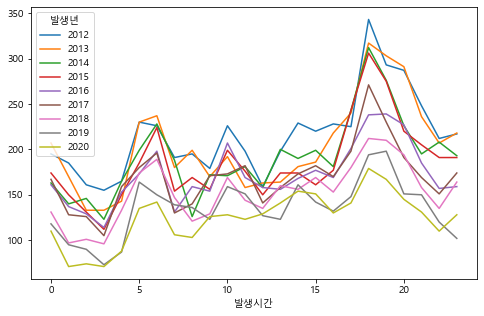

## 위도, 경도좌표를 활용한 위치 시각화
- `folium` 활용

### 서울의 사고데이터만 필터링

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생월,발생시간
35,2012,2012-01-07 03:00:00,야간,토,1,1,0,0,0,대구,달성군,차량단독,전도전복,전도전복,안전운전 의무 불이행,단일로,기타단일로,화물차,없음,1088095,1752897,128.474592,35.768517,1,3
195,2012,2012-01-22 14:00:00,주간,일,1,5,4,0,0,대구,북구,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,1092677,1769521,128.527206,35.917956,1,14
342,2012,2012-01-18 19:00:00,야간,수,1,1,0,0,0,대구,달성군,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1085268,1751475,128.443170,35.755946,1,19
390,2012,2012-01-10 03:00:00,야간,화,1,1,0,0,0,대구,서구,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,1096971,1763434,128.574051,35.862668,1,3
595,2012,2012-01-16 07:00:00,주간,월,1,1,0,0,0,대구,달서구,차대사람,기타,기타,안전운전 의무 불이행,단일로,횡단보도상,승용차,보행자,1095040,1757381,128.551946,35.808292,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36999,2020,2020-09-08 21:00:00,야간,화,1,1,0,0,0,대구,수성구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1108904,1761123,128.705880,35.840582,9,21
37009,2020,2020-10-30 08:00:00,주간,금,1,1,0,0,0,대구,달서구,차대차,기타,기타,신호위반,교차로,교차로내,이륜차,승용차,1092862,1761999,128.530498,35.849335,10,8
37019,2020,2020-12-23 06:00:00,주간,수,1,1,0,0,0,대구,달서구,차대사람,횡단중,횡단중,과속,단일로,기타단일로,승용차,보행자,1094789,1758817,128.549338,35.821261,12,6
37095,2020,2020-10-24 08:00:00,주간,토,1,1,0,0,0,대구,수성구,차대차,측면충돌,측면충돌,신호위반,단일로,기타단일로,승용차,이륜차,1108576,1761226,128.702263,35.841547,10,8


### 2020년에 발생한 사고들 시각화
- 서울의 중심 좌표(`location`) : **(37.5642135, 127.0016985)**
- 지도 확대(`zoom_start`) : **11**
- `CircleMarker`로 교통사고를 시각화

In [90]:
import folium
seoul_2020 = 
map1 = 

for lat, lng, victim, type1, type2 in seoul_2020[['위도', '경도',
                                    '사상자수','사고유형_대분류',
                                    '사고유형_중분류']].values:
    # 마커 생성
    
    
map1

### 전체 데이터(2012년~2020년)에 발생한 사고들 시각화
- 서울의 중심 좌표(`location`) : **(37.5642135, 127.0016985)**
- 지도 확대(`zoom_start`) : **11**
- `CircleMarker`로 교통사고를 시각화
- 연도별 사고를 마커의 색상으로 구분

In [94]:
map2 = 

color = {
    2012:'#023eff', 2013:'#ff7c00', 2014:'#1ac938', 
    2015:'#e8000b', 2016:'#8b2be2', 2017:'#9f4800',
    2018:'#f14cc1', 2019:'#a3a3a3', 2020:'#ffc400'
}

for year, lat, lng, victim, type1, type2 in seoul[['발생년', '위도', '경도',
                                        '사상자수','사고유형_대분류',
                                        '사고유형_중분류']].values:
    # 마커 생성
    
    
map2